In [10]:
class Point: 
    def __init__(self, x, y): 
        self.x = x 
        self.y = y 
# Given three colinear points p, q, r, the function checks if  
# point q lies on line segment 'pr'  
def onSegment(p, q, r): 
    if ( (q.x <= max(p.x, r.x)) and (q.x >= min(p.x, r.x)) and 
           (q.y <= max(p.y, r.y)) and (q.y >= min(p.y, r.y))): 
        return True
    return False
  
def orientation(p, q, r): 
    # to find the orientation of an ordered triplet (p,q,r) 
    # function returns the following values: 
    # 0 : Colinear points 
    # 1 : Clockwise points 
    # 2 : Counterclockwise 
      
    # See https://www.geeksforgeeks.org/orientation-3-ordered-points/amp/  
    # for details of below formula.  
      
    val = (float(q.y - p.y) * (r.x - q.x)) - (float(q.x - p.x) * (r.y - q.y)) 
    if (val > 0): 
          
        # Clockwise orientation 
        return 1
    elif (val < 0): 
          
        # Counterclockwise orientation 
        return 2
    else: 
          
        # Colinear orientation 
        return 0
  
# The main function that returns true if  
# the line segment 'p1q1' and 'p2q2' intersect. 
def doIntersect(p1,q1,p2,q2): 
      
    # Find the 4 orientations required for  
    # the general and special cases 
    o1 = orientation(p1, q1, p2) 
    o2 = orientation(p1, q1, q2) 
    o3 = orientation(p2, q2, p1) 
    o4 = orientation(p2, q2, q1) 
  
    # General case 
    if ((o1 != o2) and (o3 != o4)): 
        return True
  
    # Special Cases 
  
    # p1 , q1 and p2 are colinear and p2 lies on segment p1q1 
    if ((o1 == 0) and onSegment(p1, p2, q1)): 
        return True
  
    # p1 , q1 and q2 are colinear and q2 lies on segment p1q1 
    if ((o2 == 0) and onSegment(p1, q2, q1)): 
        return True
  
    # p2 , q2 and p1 are colinear and p1 lies on segment p2q2 
    if ((o3 == 0) and onSegment(p2, p1, q2)): 
        return True
  
    # p2 , q2 and q1 are colinear and q1 lies on segment p2q2 
    if ((o4 == 0) and onSegment(p2, q1, q2)): 
        return True
  
    # If none of the cases 
    return False

In [44]:
x = 0
y = 1

def orientation(p, q, r): 
    val = (float(all_point[q,y] - all_point[p,y]) * (all_point[r,x] - all_point[q,x])) - (float(all_point[q,x] - all_point[p,x]) * (all_point[r,y] - all_point[q,y])) 
    if (val > 0):           
        # Clockwise orientation 
        return 1
    elif (val < 0): 
        # Counterclockwise orientation 
        return 2
    else: 
        # Colinear orientation 
        return 0
  
def doIntersect(p1,q1,p2,q2): 
      
    # Find the 4 orientations required for  
    # the general and special cases 
    o1 = orientation(p1, q1, p2) 
    o2 = orientation(p1, q1, q2)
    o3 = orientation(p2, q2, p1) 
    o4 = orientation(p2, q2, q1) 
  
    if(o1 == 0 or o2 == 0 or o3 == 0 or o4 == 0):
        return False

    if ((o1 != o2) and (o3 != o4)): 
        return True  
    return False

11
12


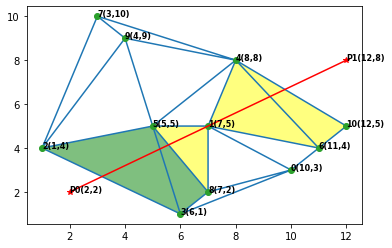

19
20


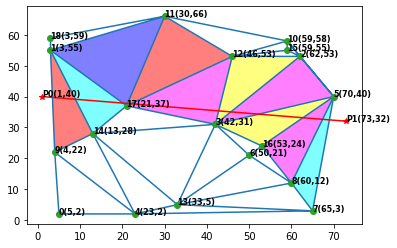

40
41


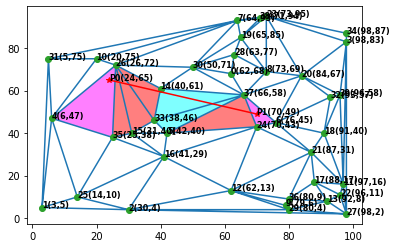

In [61]:
# 2019 4월 it works.

import numpy as np
import matplotlib.pyplot as plt
import random as rand
from scipy.spatial import Delaunay

colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow']

def split_line(line):
    return line.split(" ")

splitter_func = np.vectorize(split_line)

filetargets = ['points1', 'HARI SETIAWAN_dt01', 'HARI SETIAWAN_dt02']

for filetarget in filetargets:
    filepath = filetarget+'.txt'
    fileout = filetarget+'_out.txt'
    with open(filepath) as f:
        lines = f.read().splitlines()

        intersect_lines = lines[-2:]
        intersect = []
        lines = lines[1:-2]
        points = []
        all_point = []
        for i in lines:
            temp = i.split(" ")
            points.append([temp[0],temp[1]])
            all_point.append([temp[0],temp[1]])
        for i in intersect_lines:
            temp = i.split(" ")
            intersect.append([temp[0],temp[1]])
            all_point.append([temp[0],temp[1]])

        intersect = np.asarray(intersect).astype(int)
        points = np.asarray(points).astype(int)
        all_point = np.asarray(all_point).astype(int)
    for i in range(len(points)) :
        ptxt =  str(i) + "(" + str(points[i][0]) + "," + str(points[i][1]) + ")"
        plt.annotate( ptxt, (points[i][0], points[i][1]), fontsize=8, fontweight='bold' )
    for i in range(len(intersect)) :
        ptxt =  "P"+str(i) + "(" + str(intersect[i][0]) + "," + str(intersect[i][1]) + ")"
        plt.annotate( ptxt, (intersect[i][0], intersect[i][1]), fontsize=8, fontweight='bold' )



    tri = Delaunay(points)

    with open(fileout, "a") as myfile:
        p1 = len(all_point)-2
        q1 = len(all_point)-1
        print(p1)
        print(q1)
        for p in tri.simplices :
            edges = []
            edges.append([p[0],p[1]])
            edges.append([p[1],p[2]])
            edges.append([p[0],p[2]])
            crossing = False
            for edge in edges:
                p2 = edge[0]
                q2 = edge[1]
                if doIntersect(p1, q1, p2, q2): 
                    crossing = True
                    break
            if crossing:
                plt.fill(all_point[p,x], all_point[p,1], colors[rand.randrange(0,6)],alpha=0.5)
                myfile.write(' '.join(p.astype(str)))
                myfile.write('\r\n')
        myfile.close()



    plt.triplot(points[:,0], points[:,1], tri.simplices.copy())
    plt.plot(points[:,0], points[:,1], 'o')
    plt.plot(intersect[:,0], intersect[:,1], '*-r')  #Plot the intersecting line
    plt.show()